# Chapter 04: Recursion

## Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercises
### R-4.1
Describe a recursive algorithm for finding the maximum element in a sequence $S$, of $n$ elements. What is your running time and space usage?

#### Solution

In [2]:
def max_recursive(seq, start):
    
    if len(seq) == 1: # base case
        return seq[0]

    if seq[start] <= seq[start + 1]: # Delete the minimum elements
        del seq[start]
    
    elif seq[start] > seq[start + 1]: # Delete the minimum elements
        del seq[start + 1]
    else:
        return KeyError()
    
    return max_recursive(seq, start)

    

In [3]:
seq1 = np.random.randint(0, 10, size=(10,)).tolist()
print("maximum of seq1 should be ", max(seq1))
seq2 = np.random.randint(0, 100, size=(100,)).tolist()
print("maximum of seq1 should be ", max(seq2))
seq3 = np.random.randint(0, 1000, size=(1000,)).tolist()
print("maximum of seq1 should be ", max(seq3))

print("seq1: ", max_recursive(seq1, 0))
print("seq2: ", max_recursive(seq2, 0))
print("seq3: ", max_recursive(seq3, 0))


maximum of seq1 should be  8
maximum of seq1 should be  97
maximum of seq1 should be  999
seq1:  8
seq2:  97
seq3:  999


### R-4.2
Draw the recursion trace for the computation of power(2,5), using the traditional function implemented in Code Fragment 4.11.

#### Solution

In [8]:
def power(x,n):
    """Compute the value x^n for integer n."""
    if n==0:
        return 1
    else:
        return x*power(x, n-1)
    
'''
0. power (2,5) --> 2*16 = 32
    1. power (2,4) --> 2*8 = 16
        2. power (2,3) --> 2*4 = 8
            3. power (2,2) --> 2*2 = 4
                4. power (2,1) --> 2*1 = 2
                    5. power (2,0) --> 1
'''

'\n0. power (2,5) --> 2*16 = 32\n1. power (2,4) --> 2*8 = 16\n2. power (2,3) --> 2*4 = 8\n3. power (2,2) --> 2*2 = 4\n4. power (2,1) --> 2*1 = 2\n5. power (2,0) --> 1\n'

In [7]:
power(2,5)

32

### R-4.3
Draw the recursion trace for the computation of power(2,18), using the repeated squaring algorithm, as implemented in Code Fragment 4.12.

#### Solution

In [13]:
9//2

4

In [14]:
def power(x, n):
    """Compute the value x^n for integer n."""
    if n==0:
        return 1
    else:
        partial = power(x, n//2)
        result = partial*partial # divide and conquer
        if n%2 == 1:
            result *= x
        return result

'''
0. power (2,18) --> 512 * 512 = 262144
    1. power (2,9) * power (2,9) * 2 --> 16*16*2 = 512
        2.  power (2,4) * power (2,4) --> 4*4 = 16
              3. power (2,2) * power (2,2) --> 2*2 = 4
                    4. power (2,1) * power (2,1) * 2 = 2
                        5. power (2,0) * power (2,0) = 1

'''

'\n0. power (2,18) --> 512 * 512 = 262144\n    1. power (2,9) * power (2,9) * 2 --> 16*16*2 = 512\n        2.  power (2,4) * power (2,4) --> 4*4 = 16\n              3. power (2,2) * power (2,2) --> 2*2 = 4\n                    4. power (2,1) * power (2,1) * 2 = 2\n                        5. power (2,0) * power (2,0) = 1\n\n'

In [10]:
power(2,18)

262144

### R-4.4
Draw the recursion trace for the execution of function reverse(S, 0, 5) (Code Fragment 4.10) on S = [4, 3, 6, 2, 6].

#### Solution

In [15]:
def reverse(S, start, stop):
    '''Reverse elements in implicit slice S[start:stop].'''
    if start < stop-1:
        S[start], S[stop-1] = S[stop-1], S[start]
        reverse(S, start+1, stop-1)

'''
1. [6,3,6,2,4]
    2. [6,2,6,3,4]
        3. [6,2,6,3,4]
'''

In [18]:
S = [4, 3, 6, 2, 6]
reverse(S,0,5)
S


[6, 2, 6, 3, 4]

### R-4.5
Draw the recursion trace for the execution of function PuzzleSolve(3,S,U) (Code Fragment 4.14), where S is empty and U = {a, b, c, d}.

#### Solution

In [20]:
def solves(S):
    #Note, this is a random solution to the pseudoproblem
    return S == ['d','b','c']


def PuzzleSolver(k, S, U):
    # Brute force puzzle solver that tests all permutations of string and try to hit solves(S) is True
    for e in sorted(U).copy():
        S.append(e)
        U.remove(e)
        if k==1:
            print(S)
            if solves(S):
                print( f'Solution found: {S}')
        else:
            PuzzleSolver(k-1, S, U)
        U.add(S.pop())  #removes the last item of an array
        


In [23]:
U = {'a', 'b', 'c', 'd'}
S = []
PuzzleSolver(3,S,U)

['a', 'b', 'c']
['a', 'b', 'd']
['a', 'c', 'b']
['a', 'c', 'd']
['a', 'd', 'b']
['a', 'd', 'c']
['b', 'a', 'c']
['b', 'a', 'd']
['b', 'c', 'a']
['b', 'c', 'd']
['b', 'd', 'a']
['b', 'd', 'c']
['c', 'a', 'b']
['c', 'a', 'd']
['c', 'b', 'a']
['c', 'b', 'd']
['c', 'd', 'a']
['c', 'd', 'b']
['d', 'a', 'b']
['d', 'a', 'c']
['d', 'b', 'a']
['d', 'b', 'c']
Solution found: ['d', 'b', 'c']
['d', 'c', 'a']
['d', 'c', 'b']


### R-4.6
Describe a recursive function for computing the $n^\text{th}$ **Harmonic number** , $H_n = \sum_{i=1}^n 1/i$

#### Solution

In [24]:
def get_harmonic(n):
    # https://en.wikipedia.org/wiki/Harmonic_number
    if n == 1:
        return 1
    return (1 / n) + get_harmonic(n-1)

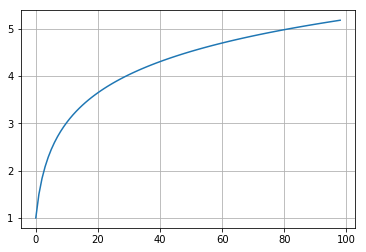

In [72]:
harmonic_series = [get_harmonic(i) for i in range(1, 100)]
plt.plot(harmonic_series)
plt.grid()


### R-4.7
Describe a recursive function for converting a string of digits into the integer it represents. For example,   13531   represents the integer 13,531.

#### Solution

In [25]:
# To be solved

### R-4.8
Isabel has an interesting way of summing up the values in a sequence A of n integers, where n is a power of two. She creates a new sequence B of half the size of A and sets B[i] = A[2i]+A[2i+1], for i = 0,1,...,(n/2)−1. If B has size 1, then she outputs B[0]. Otherwise, she replaces A with B, and repeats the process. What is the running time of her algorithm?

#### Solution

In [28]:
import math
def sum_is(A):
    #len(A) must be power of 2 - check if it is an integer
    assert math.log(len(A),2)%1 == 0, 'Your array must be a length that is a power of 2'
    
    if len(A) == 1:
        return A[0]
    else:
        B = [None]*(len(A)//2)
        for i in range(len(B)):
            B[i] = A[2*i] + A[2*i-1] 
        return sum_is(B) 
    
sum_is([1,2,3,4,5,6,7,8])

#Run-time is O(lgn) as she halves the calculation each recursion, similar to a binary search

36

### C-4.9
Write a short recursive Python function that finds the minimum and maximum values in a sequence without using any loops.

#### Solution

In [29]:
def min_max(S, index=0):
    if index == len(S)-1: # Base Case: 1 element
        return S[index], S[index]  # The current min and max values, which is set as the last element of the list
    else:
        min_c, max_c = min_max(S, index+1)
        return min(S[index], min_c), max(S[index], max_c) # Compare current min and max with current index value
    
    
print(min_max([1,2,3,4,5,6,7,8]))
print(min_max([-45,2,774,5,6,7,8]))
print(min_max([8,7,6,5,4,3,2,1]))

(1, 8)
(-45, 774)
(1, 8)


### C-4.10
Describe a recursive algorithm to compute the integer part of the base-two logarithm of n using only addition and integer division.

#### Solution

In [31]:
def log2_int(n):
    if n <= 0:
        raise ValueError('Input must be greater than 0')
    elif 0 < n < 2:
        return 0
    else:
        x = 1
        x += log2_int(n/2) # log base 2 is to divide by 2 each time, and add 1 if division is successful
        return x
    
for n in range(10):
    print('the integer part of the base-two logarithm of {0} is {1}'
            .format(2**n, log2_int(2**n)))

the integer part of the base-two logarithm of 1 is 0
the integer part of the base-two logarithm of 2 is 1
the integer part of the base-two logarithm of 4 is 2
the integer part of the base-two logarithm of 8 is 3
the integer part of the base-two logarithm of 16 is 4
the integer part of the base-two logarithm of 32 is 5
the integer part of the base-two logarithm of 64 is 6
the integer part of the base-two logarithm of 128 is 7
the integer part of the base-two logarithm of 256 is 8
the integer part of the base-two logarithm of 512 is 9


### C-4.11
Describe an efficient recursive function for solving the element uniqueness problem, which runs in time that is at most O(n^2) in the worst case without using sorting.

#### Solution

In [40]:
elemFrequency = dict()

def elem_unique(S, index=0):
    if len(S) == index:
        return True
    elif S[index] not in elemFrequency:
        elemFrequency[S[index]] = 1
        indexNew = index + 1
        flag = elem_unique(S,indexNew)
        return flag
    else:
        return False
    
for S in [[1,2,3,4,5,6], 
          [3,4,5,2,3,4,6,7],
          [234,654,32,543,652]
         ]:
    print(elem_unique(S))

True
False
True


### C-4.12
Give a recursive algorithm to compute the product of two positive integers, m and n, using only addition and subtraction.

#### Solution

In [41]:
def product(m, n):
    sign = (n >= 0) # flag to see if positive
    n = abs(n) # cast as absolute first
    if n > 0:
        result = m + product(m, n-1) # do usual addition
    else:
        result = 0 # base case
    return result if sign else -result # change sign if n was negative

product(4,2)

8

### C-4.13
In Section 4.2 we prove by induction that the number of lines printed by a call to draw interval(c) is 2^c − 1. Another interesting question is how many dashes are printed during that process. Prove by induction that the number of dashes printed by draw interval(c) is 2^(c+1) − c − 2.

#### Solution

In [42]:
# To be solved

### C-4.14
In the ***Towers of Hanoi*** puzzle, we are given a platform with three pegs, $a, b,$ and $c$, 
sticking out of it. On peg $a$ is a stack of $n$ disks, each larger than the next, so that the smallest is on the top and the largest is on the bottom. The puzzle is to move all the disk from peg $a$ to peg $c$, moving one disk at a time, so that we never place a larger disk on top of a smaller one. Describe a recursive algorithm for solving the Towers of Hanoi puzzle for arbitrary $n$.

#### Solution

In [76]:
def move_disk(from_peg, to_peg):
    to_peg.append(from_peg.pop())
    print("=============[Status]=============")
    print("[a]: ", a)
    print("[b]: ", b)
    print("[c]: ", c)

def hanoi(n, from_peg, help_peg, to_peg):
    if n == 1:
        move_disk(from_peg, to_peg)
    else:
        hanoi(n-1, from_peg, to_peg, help_peg)
        move_disk(from_peg, to_peg)
        hanoi(n-1, help_peg, from_peg, to_peg)


In [77]:
n = 4
a = list(reversed(range(1,int(n)+1)))
b = [];
c = [];

print("[a]: ", a)
print("[b]: ", b)
print("[c]: ", c)

[a]:  [4, 3, 2, 1]
[b]:  []
[c]:  []


In [78]:
hanoi(4, a, b, c)

=============[Status]=============
[a]:  [4, 3, 2]
[b]:  [1]
[c]:  []
=============[Status]=============
[a]:  [4, 3]
[b]:  [1]
[c]:  [2]
=============[Status]=============
[a]:  [4, 3]
[b]:  []
[c]:  [2, 1]
=============[Status]=============
[a]:  [4]
[b]:  [3]
[c]:  [2, 1]
=============[Status]=============
[a]:  [4, 1]
[b]:  [3]
[c]:  [2]
=============[Status]=============
[a]:  [4, 1]
[b]:  [3, 2]
[c]:  []
=============[Status]=============
[a]:  [4]
[b]:  [3, 2, 1]
[c]:  []
=============[Status]=============
[a]:  []
[b]:  [3, 2, 1]
[c]:  [4]
=============[Status]=============
[a]:  []
[b]:  [3, 2]
[c]:  [4, 1]
=============[Status]=============
[a]:  [2]
[b]:  [3]
[c]:  [4, 1]
=============[Status]=============
[a]:  [2, 1]
[b]:  [3]
[c]:  [4]
=============[Status]=============
[a]:  [2, 1]
[b]:  []
[c]:  [4, 3]
=============[Status]=============
[a]:  [2]
[b]:  [1]
[c]:  [4, 3]
=============[Status]=============
[a]:  []
[b]:  [1]
[c]:  [4, 3, 2]
=============[Status]===========

### C-4.15
Write a recursive function that will output all the subsets of a set of n
elements (without repeating any subsets).

#### Solution

In [45]:
# To be solved

### C-4.16
Write a short recursive Python function that takes a character string s and outputs its reverse. For example, the reverse of pots&pans would be
snap&stop 

#### Solution

In [60]:
def reverse(S, start, stop):
    S[start], S[stop] = S[stop], S[start]
    if(start < stop-1):
        reverse(S, start+1, stop-1)
        return S
        
    
S = list('pots&pans')
length = len(S)
print(''.join(reverse(S, 0, length-1)))

snap&stop


### C-4.17
Write a short recursive Python function that determines if a string s is a palindrome, that is, it is equal to its reverse. For example,   racecar   and
gohangasalamiimalasagnahog   are palindromes.

#### Solution

In [64]:
def reverse(S, start, stop):
    S[start], S[stop] = S[stop], S[start]
    if(start < stop-1):
        reverse(S, start+1, stop-1)
        return S
        
    
S = ['pots&pans', 'racecar', 'gohangasalamiimalasagnahog']
print(S)
for i in S:
    length = len(i)
    s = ''.join(reverse(list(i), 0, length - 1))
    if(s == i):
        print(True)
    else:
        print(False)
    

['pots&pans', 'racecar', 'gohangasalamiimalasagnahog']
False
True
True


### C-4.18
Use recursion to write a Python function for determining if a string $s$ has more vowels than consonants.

#### Solution

In [206]:
VOWEL = ['a','e','i','o','u']
VOWEL

['a', 'e', 'i', 'o', 'u']

In [277]:
def more_vowels(s, vowels, consonants):
    if not s:
        vowel_count = len(vowels)
        consonant_count = len(consonants)
        return True if vowel_count > consonant_count else False
    
    if s[-1] in VOWEL:
        vowels.append(s.pop())
        return more_vowels(s, vowels, consonants)
    else:
        consonants.append(s.pop())
        return more_vowels(s, vowels, consonants)


In [292]:
string1_vowels = []
string1_consonants = []
string1 = list('apple')
print(more_vowels(string1, string1_vowels, string1_consonants))
print(string1_vowels)
print(string1_consonants)

False
['e', 'a']
['l', 'p', 'p']


In [293]:
string2_vowels = []
string2_consonants = []
string2 = list('aero')
print(more_vowels(string2, string2_vowels, string2_consonants))
print(string2_vowels)
print(string2_consonants)


True
['o', 'e', 'a']
['r']


### C-4.19
Write a short recursive Python function that rearranges a sequence of integer values so that all the even values appear before all the odd values.

#### Solution

In [67]:
def even_then_odd(S,index=0):
    if index == len(S)-1:
        return [S[index]] # Base case, restart the list from this element and append back
    
    else:
        if S[index]%2 == 1: #If odd, we want to add it to the end of the list
            return even_then_odd(S, index+1) + [S[index]]
        else:
            return [S[index]] + even_then_odd(S, index+1)
        
    
    
sequences = [[1,2,3,4,5,6,7,8], [4,3,65,23,5,46,765,3,45,23], [1], [2,2]]
print('Two lists approach')
for s in sequences:
    print(even_then_odd(s))
    

Two lists approach
[2, 4, 6, 8, 7, 5, 3, 1]
[4, 46, 23, 45, 3, 765, 5, 23, 65, 3]
[1]
[2, 2]


### C-4.20
Given an unsorted sequence, S, of integers and an integer k, describe a recursive algorithm for rearranging the elements in S so that all elements less than or equal to k come before any elements larger than k. What is the running time of your algorithm on a sequence of n values?

#### Solution

Two lists approach


RecursionError: maximum recursion depth exceeded in comparison

### C-4.21
Suppose you are given an n-element sequence, S, containing distinct in- tegers that are listed in increasing order. Given a number k, describe a recursive algorithm to find two integers in S that sum to k, if such a pair exists. What is the running time of your algorithm?

#### Solution

### C-4.22
Develop a nonrecursive implementation of the version of power from Code Fragment 4.12 that uses repeated squaring.

#### Solution

### P-4.23
Implement a recursive function with signature find(path, filename) that reports all entries of the file system rooted at the given path having the given file name.

#### Solution

### P-4.24
Write a program for solving summation puzzles by enumerating and test- ing all possible configurations. Using your program, solve the three puz- zles given in Section 4.4.3.

#### Solution

### P-4.25
Provide a nonrecursive implementation of the draw interval function for the English ruler project of Section 4.1.2. There should be precisely 2c − 1 lines of output if c represents the length of the center tick. If incrementing a counter from 0 to 2c − 2, the number of dashes for each tick line should be exactly one more than the number of consecutive 1’s at the end of the binary representation of the counter.

#### Solution

### P-4.26
Write a program that can solve instances of the Tower of Hanoi problem (from Exercise C-4.14).

#### Solution

### P-4.27
Python’s os module provides a function with signature walk(path) that is a generator yielding the tuple (dirpath, dirnames, filenames) for each subdirectory of the directory identified by string path, such that string dirpath is the full path to the subdirectory, dirnames is a list of the names of the subdirectories within dirpath, and filenames is a list of the names of non-directory entries of dirpath. For example, when visiting the cs016 subdirectory of the file system shown in Figure 4.6, the walk would yield ( /user/rt/courses/cs016 , [ homeworks , programs ], [ grades ]). Give your own implementation of such a walk function.

#### Solution